In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("bancos.csv")
df.head()

,Empresa,Fecha,Apertura,Máximo,Mínimo,Cierre,Volumen
0,Banco Sabadell,2021-04-01,0.4591,0.4591,0.4445,0.4553,30084389
1,Banco Sabadell,2021-04-06,0.4630,0.4778,0.4581,0.4656,44336977
2,Banco Sabadell,2021-04-07,0.4650,0.4705,0.4626,0.4673,22517116
3,Banco Sabadell,2021-04-08,0.4662,0.4695,0.4536,0.4607,30800345
4,Banco Sabadell,2021-04-09,0.4607,0.4644,0.4512,0.4600,35703383


# 1. Cierre

In [4]:
cierre = df[['Empresa', 'Fecha', 'Cierre']]
cierre.tail()

,Empresa,Fecha,Cierre
97,Caixabank,2021-04-26,2.547
98,Caixabank,2021-04-27,2.606
99,Caixabank,2021-04-28,2.617
100,Caixabank,2021-04-29,2.657
101,Caixabank,2021-04-30,2.667


In [25]:
def last2digits(string):
    return string[-2:]

cierre["Fecha"] = cierre["Fecha"].apply(last2digits)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


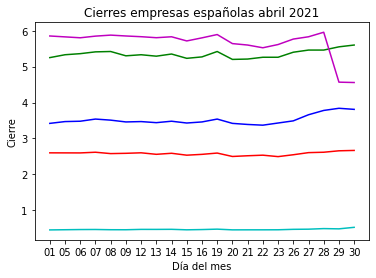

In [33]:
empresas = set(df['Empresa'].values)
estilos = ["b","g","r","c","m","y","k","w"]
plt.figure()
plt.title("Cierres empresas españolas abril 2021")
plt.ylabel("Cierre")
plt.xlabel("Día del mes")
for index, e in enumerate(empresas):
    e_cierre = cierre[df["Empresa"] == e]
    plt.plot(e_cierre["Fecha"], e_cierre["Cierre"], estilos[index])

# 2. Promedio

In [34]:
prom = df[["Empresa", "Fecha", "Apertura", "Cierre"]]
prom

,Empresa,Fecha,Apertura,Cierre
0,Banco Sabadell,2021-04-01,0.4591,0.4553
1,Banco Sabadell,2021-04-06,0.4630,0.4656
2,Banco Sabadell,2021-04-07,0.4650,0.4673
3,Banco Sabadell,2021-04-08,0.4662,0.4607
4,Banco Sabadell,2021-04-09,0.4607,0.4600
...,...,...,...,...
97,Caixabank,2021-04-26,2.5000,2.5470
98,Caixabank,2021-04-27,2.5600,2.6060
99,Caixabank,2021-04-28,2.6200,2.6170
100,Caixabank,2021-04-29,2.6290,2.6570


In [35]:
prom["Promedio"] = (prom['Apertura'] + prom['Cierre'])/2
prom

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Empresa,Fecha,Apertura,Cierre,Promedio
0,Banco Sabadell,2021-04-01,0.4591,0.4553,0.45720
1,Banco Sabadell,2021-04-06,0.4630,0.4656,0.46430
2,Banco Sabadell,2021-04-07,0.4650,0.4673,0.46615
3,Banco Sabadell,2021-04-08,0.4662,0.4607,0.46345
4,Banco Sabadell,2021-04-09,0.4607,0.4600,0.46035
...,...,...,...,...,...
97,Caixabank,2021-04-26,2.5000,2.5470,2.52350
98,Caixabank,2021-04-27,2.5600,2.6060,2.58300
99,Caixabank,2021-04-28,2.6200,2.6170,2.61850
100,Caixabank,2021-04-29,2.6290,2.6570,2.64300


In [36]:
prom.drop(columns=["Apertura", "Cierre"], inplace=True)
prom

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Empresa,Fecha,Promedio
0,Banco Sabadell,2021-04-01,0.45720
1,Banco Sabadell,2021-04-06,0.46430
2,Banco Sabadell,2021-04-07,0.46615
3,Banco Sabadell,2021-04-08,0.46345
4,Banco Sabadell,2021-04-09,0.46035
...,...,...,...
97,Caixabank,2021-04-26,2.52350
98,Caixabank,2021-04-27,2.58300
99,Caixabank,2021-04-28,2.61850
100,Caixabank,2021-04-29,2.64300


In [40]:
def last2digits(string):
    return string[-2:]

prom["Fecha"] = prom["Fecha"].apply(last2digits)
prom

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Empresa,Fecha,Promedio
0,Banco Sabadell,01,0.45720
1,Banco Sabadell,06,0.46430
2,Banco Sabadell,07,0.46615
3,Banco Sabadell,08,0.46345
4,Banco Sabadell,09,0.46035
...,...,...,...
97,Caixabank,26,2.52350
98,Caixabank,27,2.58300
99,Caixabank,28,2.61850
100,Caixabank,29,2.64300


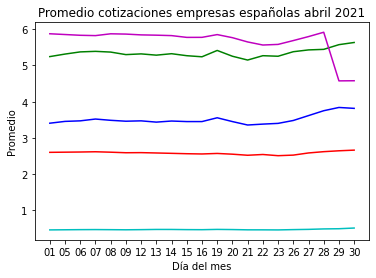

In [42]:
plt.figure()
plt.title("Promedio cotizaciones empresas españolas abril 2021")
plt.ylabel("Promedio")
plt.xlabel("Día del mes")
for index, e in enumerate(empresas):
    e_prom = prom[df["Empresa"] == e]
    plt.plot(e_prom["Fecha"], e_prom["Promedio"], estilos[index])